In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import countrygroups as cg

In [11]:
boat = pd.read_csv('./boat_data.csv')

In [33]:
boat[['Boat Type - Main','Boat Type - 2nd', 'Boat Type - 3rd']] = boat['Boat Type'].str.split(",",expand=True)

In [34]:
boat[['Condition', 'Fuel']] = boat['Type'].str.split(",",expand=True)

In [35]:
boat

,Price,USD Price Group,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,...,Amount,USD,PV Group,Age Group,Age,Boat Type - Main,Boat Type - 2nd,Boat Type - 3rd,Condition,Fuel
0,CHF 3337,Under 50K,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland,...,3337,3637.33,Good,0-5 years,5,Motor Yacht,None,None,new boat from stock,None
1,EUR 3490,Under 50K,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany,...,3490,3943.70,Medium,0-5 years,2,Center console boat,None,None,new boat from stock,None
2,CHF 3770,Under 50K,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland,...,3770,4109.30,More than avergae,NaN,0,Sport Boat,None,None,new boat from stock,None
3,DKK 25900,Under 50K,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark,...,25900,3885.00,Low,0-5 years,2,Sport Boat,None,None,new boat from stock,None
4,EUR 3399,Under 50K,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany,...,3399,3840.87,Low,0-5 years,3,Fishing Boat,None,None,new boat from stock,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9883,CHF 4900,Under 50K,Sport Boat,Sea Ray power boats,"Used boat,Unleaded",1987,6.30,2.44,NaN,Switzerland,...,4900,5341.00,Good,28-50 years,35,Sport Boat,None,None,Used boat,Unleaded
9884,EUR 4516,Under 50K,Sport Boat,NaN,new boat from stock,0,4.17,1.68,GRP,Germany,...,4516,5103.08,Medium,NaN,0,Sport Boat,None,None,new boat from stock,None
9885,EUR 4499,Under 50K,Sport Boat,BlueCraft power boats,"new boat from stock,Unleaded",2020,4.40,1.80,GRP,Germany,...,4499,5083.87,Good,0-5 years,2,Sport Boat,None,None,new boat from stock,Unleaded
9886,EUR 4300,Under 50K,Pontoon Boat,Whaly power boats,new boat from stock,2018,4.37,1.89,NaN,Italy,...,4300,4859.00,Good,0-5 years,4,Pontoon Boat,None,None,new boat from stock,None


In [16]:
boat['Currency'] = boat['Price'].str[:3]
boat['Amount'] = boat['Price'].str[4:10].str.strip().astype(int)

In [18]:
dict = {'CHF' : 1.09, 'EUR' : 1.13, 'DKK': 0.15, 'Â£ ' : 1.35}
boat.replace({'Currency': dict},inplace=True)
boat['USD'] = boat['Currency'] * boat['Amount']

In [19]:
price_category = pd.cut(boat['USD'],bins=[0,50001,110001,290001,400001,35030000],labels=['Under 50K','Cheap','Average','Expensive', 'Very Expensive'])
boat.insert(1,'USD Price Group',price_category)

In [25]:
boat['Age'] = 2022 - boat['Year Built']
boat['Age'] = boat['Age'].replace(2022, 0)

In [26]:
age_category = pd.cut(boat.Age,bins=[0,6,17,28,51,101,137],labels=['0-5 years', '6-16 years','17-27 years', '28-50 years', '51-100 years', '101+ years'])
boat.insert(15,'Age Group',age_category)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


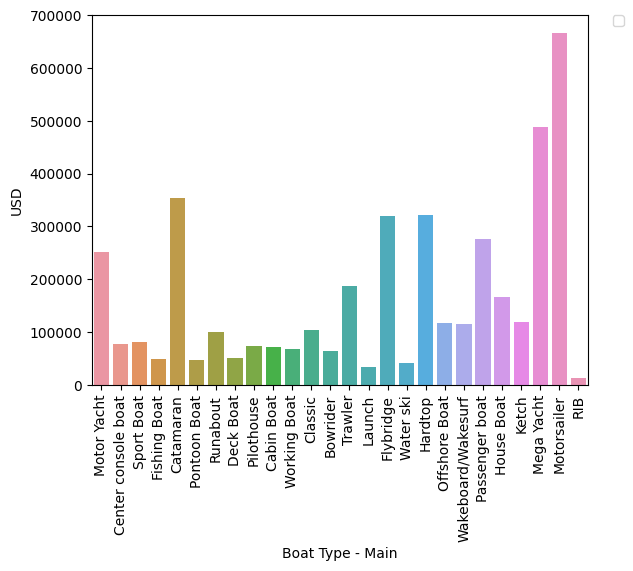

In [45]:
plt.plot()
sns.barplot(x='Boat Type - Main',y='USD',data=boat,ci=None)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [42]:
boat['Boat Type - Main'].value_counts()[:10]

Motor Yacht            2736
Sport Boat             1417
Flybridge              1203
Trawler                 679
Cabin Boat              654
Pilothouse              614
Hardtop                 513
Center console boat     377
Bowrider                310
Deck Boat               285
Name: Boat Type - Main, dtype: int64

In [23]:
pv_category = pd.cut(boat['Number of views last 7 days'],bins=[0,71,111,176,1301,3263],labels=['Low', 'Medium','More than avergae', 'Good', 'Best'])
boat.insert(14,'PV Group',pv_category)

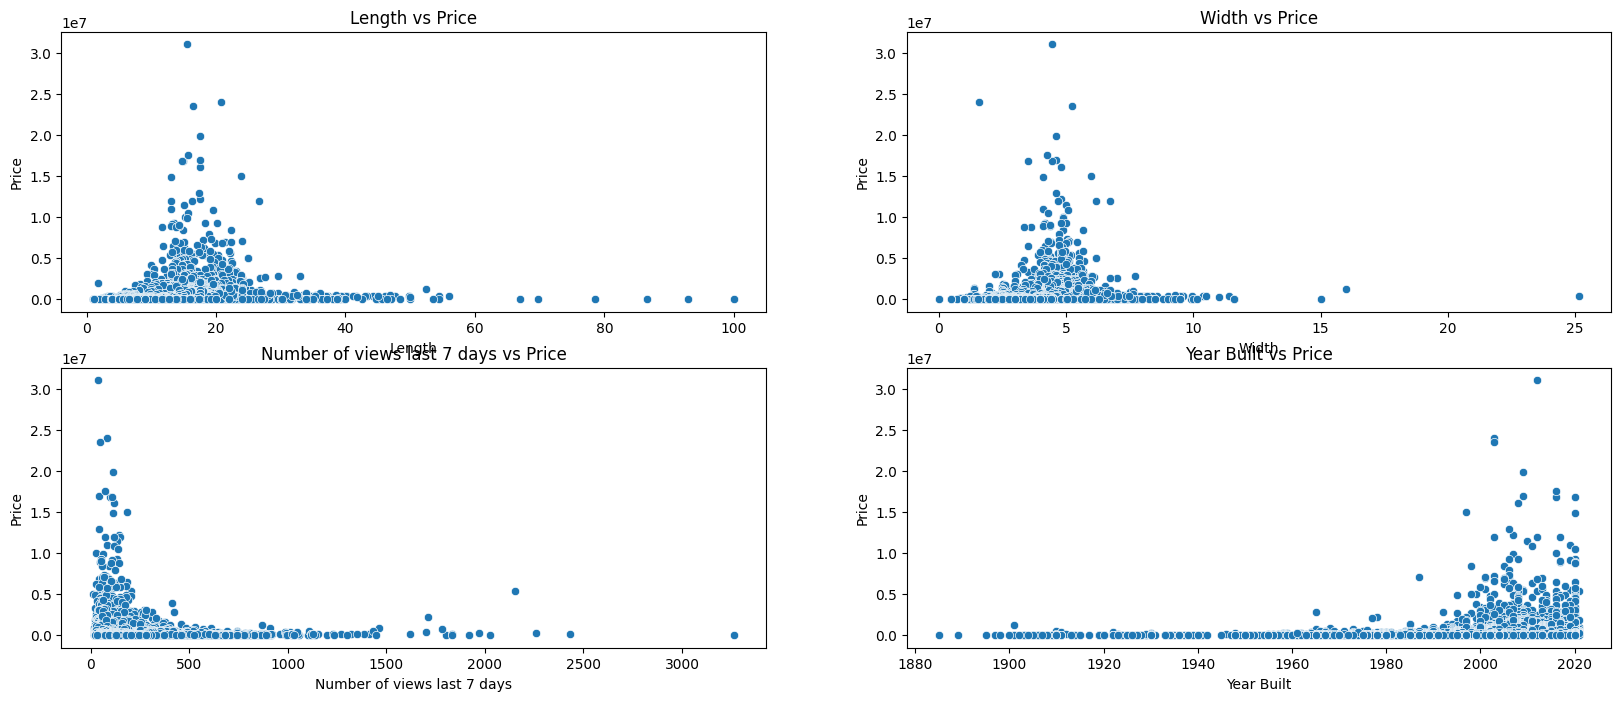

In [92]:
fig, axs = plt.subplots(2,2, figsize=(20,8))
sns.scatterplot(x='Length', y='Price', data=data, ax=axs[0,0])
axs[0,0].set_title('Length vs Price')
sns.scatterplot(x='Width', y='Price', data=data, ax=axs[0,1])
axs[0,1].set_title('Width vs Price')
sns.scatterplot(x='Number of views last 7 days', y='Price', data=data, ax=axs[1,0])
axs[1,0].set_title('Number of views last 7 days vs Price')
sns.scatterplot(x='Year Built', y='Price', data=data, ax=axs[1,1])
axs[1,1].set_title('Year Built vs Price')
plt.show();

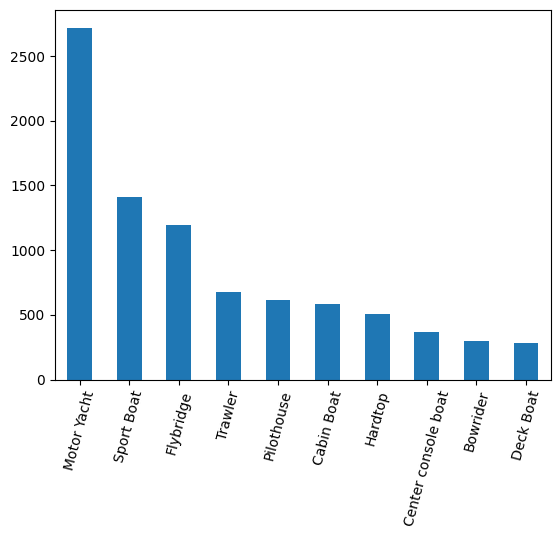

In [71]:
plt.plot()
data['Boat Type'].value_counts()[:10].plot(kind='bar')
plt.xticks(rotation=75)
plt.show()

In [145]:
top_three_boatType = data[data['Boat Type'].isin(data['Boat Type'].value_counts()[:3].index)]


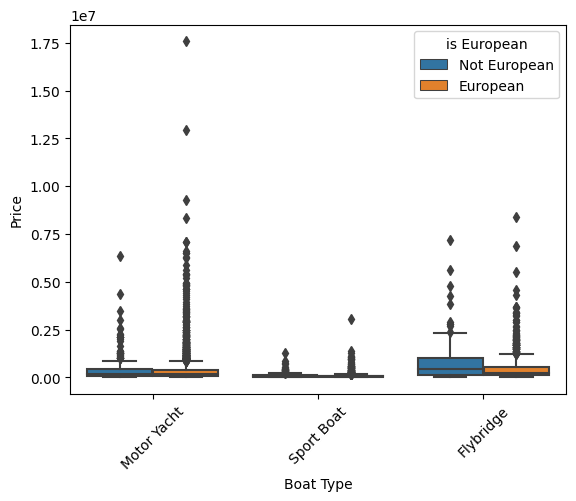

In [146]:
plt.plot()
sns.boxplot(x= top_three_boatType['Boat Type'],y= top_three_boatType['Price'],hue= top_three_boatType['is European'])
plt.xticks(rotation=45)
plt.show()

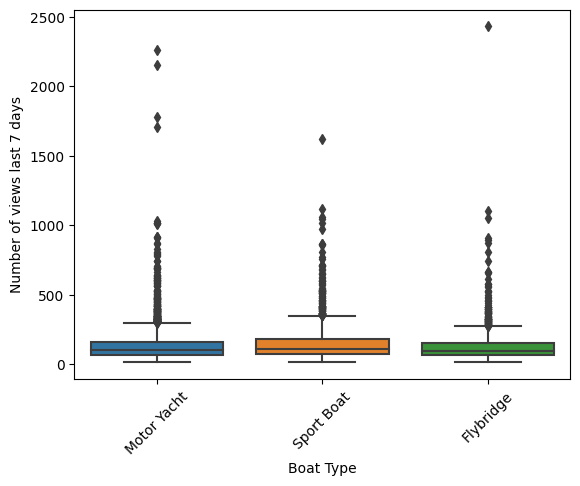

In [81]:
plt.plot()
sns.boxplot(x= top_three_boatType['Boat Type'],y= top_three_boatType['Number of views last 7 days'])
plt.xticks(rotation=45)
plt.show()

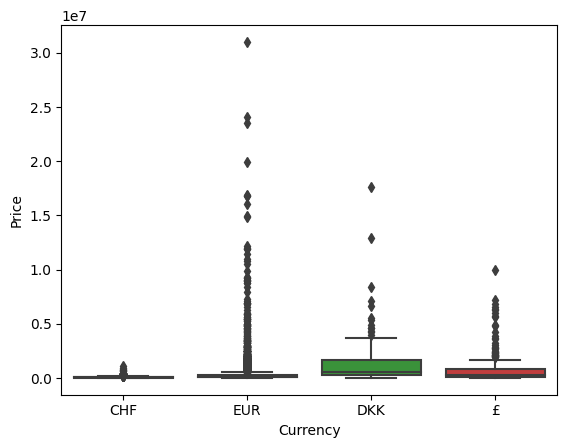

In [107]:
plt.plot()
sns.boxplot(x= data['Currency'],y= data['Price']).set_xticklabels(['CHF','EUR','DKK','£'])
plt.show()

In [144]:
for index , row in data.iterrows():
    if row['Location'] in cg.EUROPEAN_UNION.names:
        data.loc[index,'is European'] = 'European'
    else:
        data.loc[index,'is European'] = 'Not European'
    


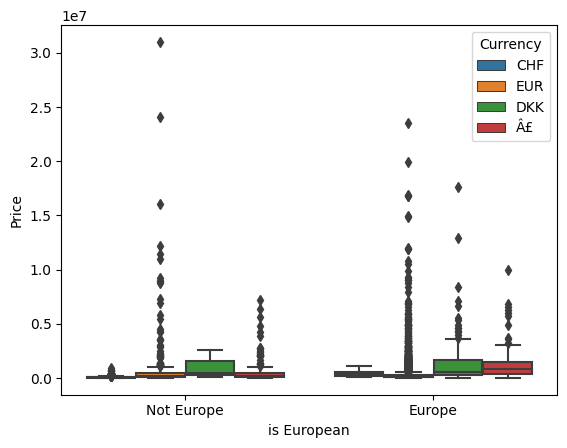

In [141]:
plt.plot()
sns.boxplot(x= data['is European'],y= data['Price'],hue=data['Currency'])
plt.show()

In [131]:
df = pd.DataFrame([{'c1':10, 'c2':100}, {'c1':11,'c2':110}, {'c1':12,'c2':120}])
for index, row in df.iterrows():
    print(row['c1'], row['c2'])

10 100
11 110
12 120


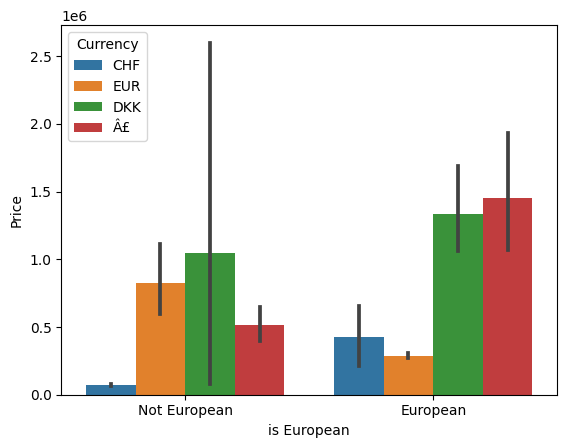

In [148]:
plt.plot()
sns.barplot(x= data['is European'],y= data['Price'],hue=data['Currency']);

In [152]:
data.to_csv('./clean_boat_data.csv', index=False)

In [154]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanaliozkan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Shape of your Data Set loaded: (9888, 12)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    12 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
Number of All Scatter Plots = 6


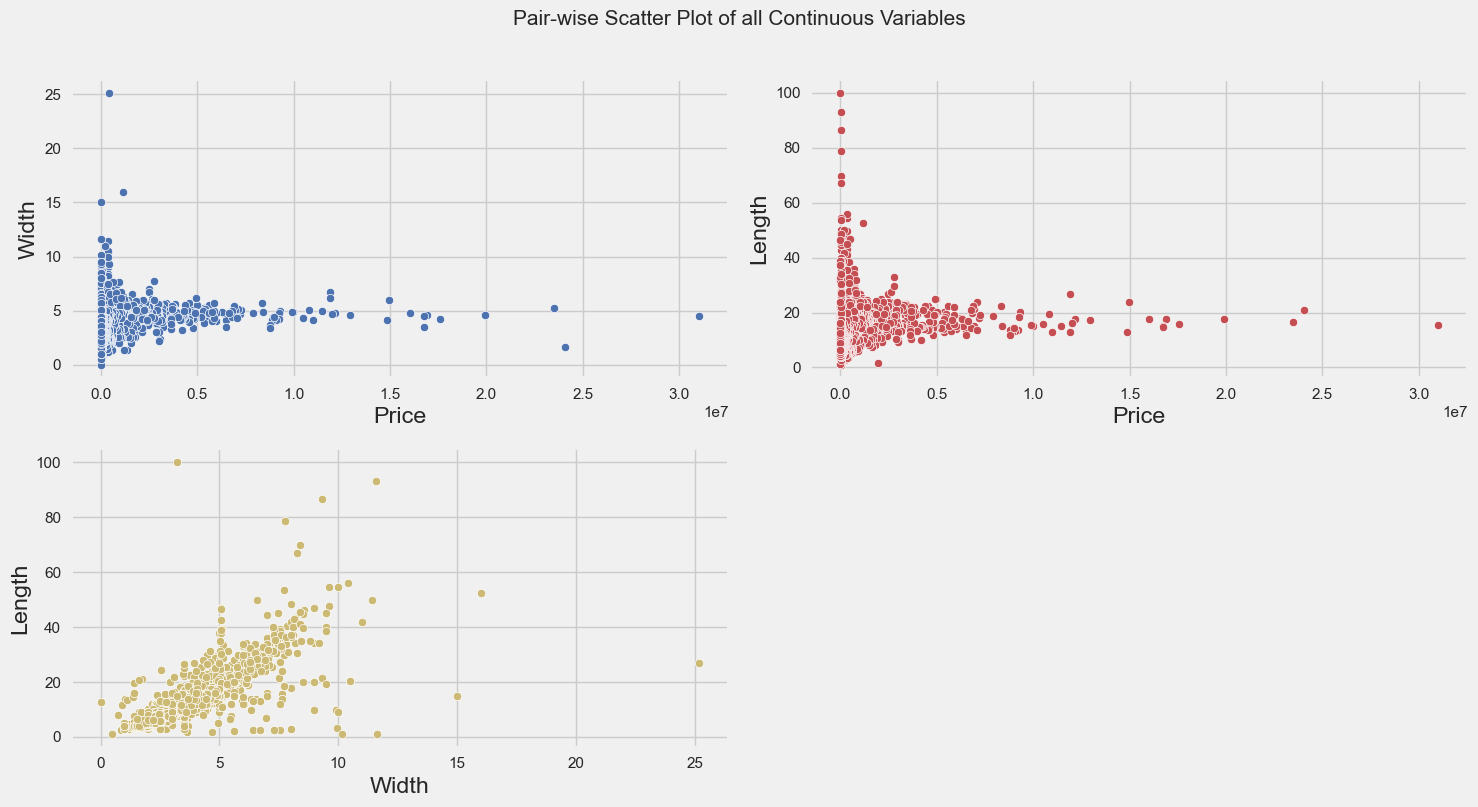

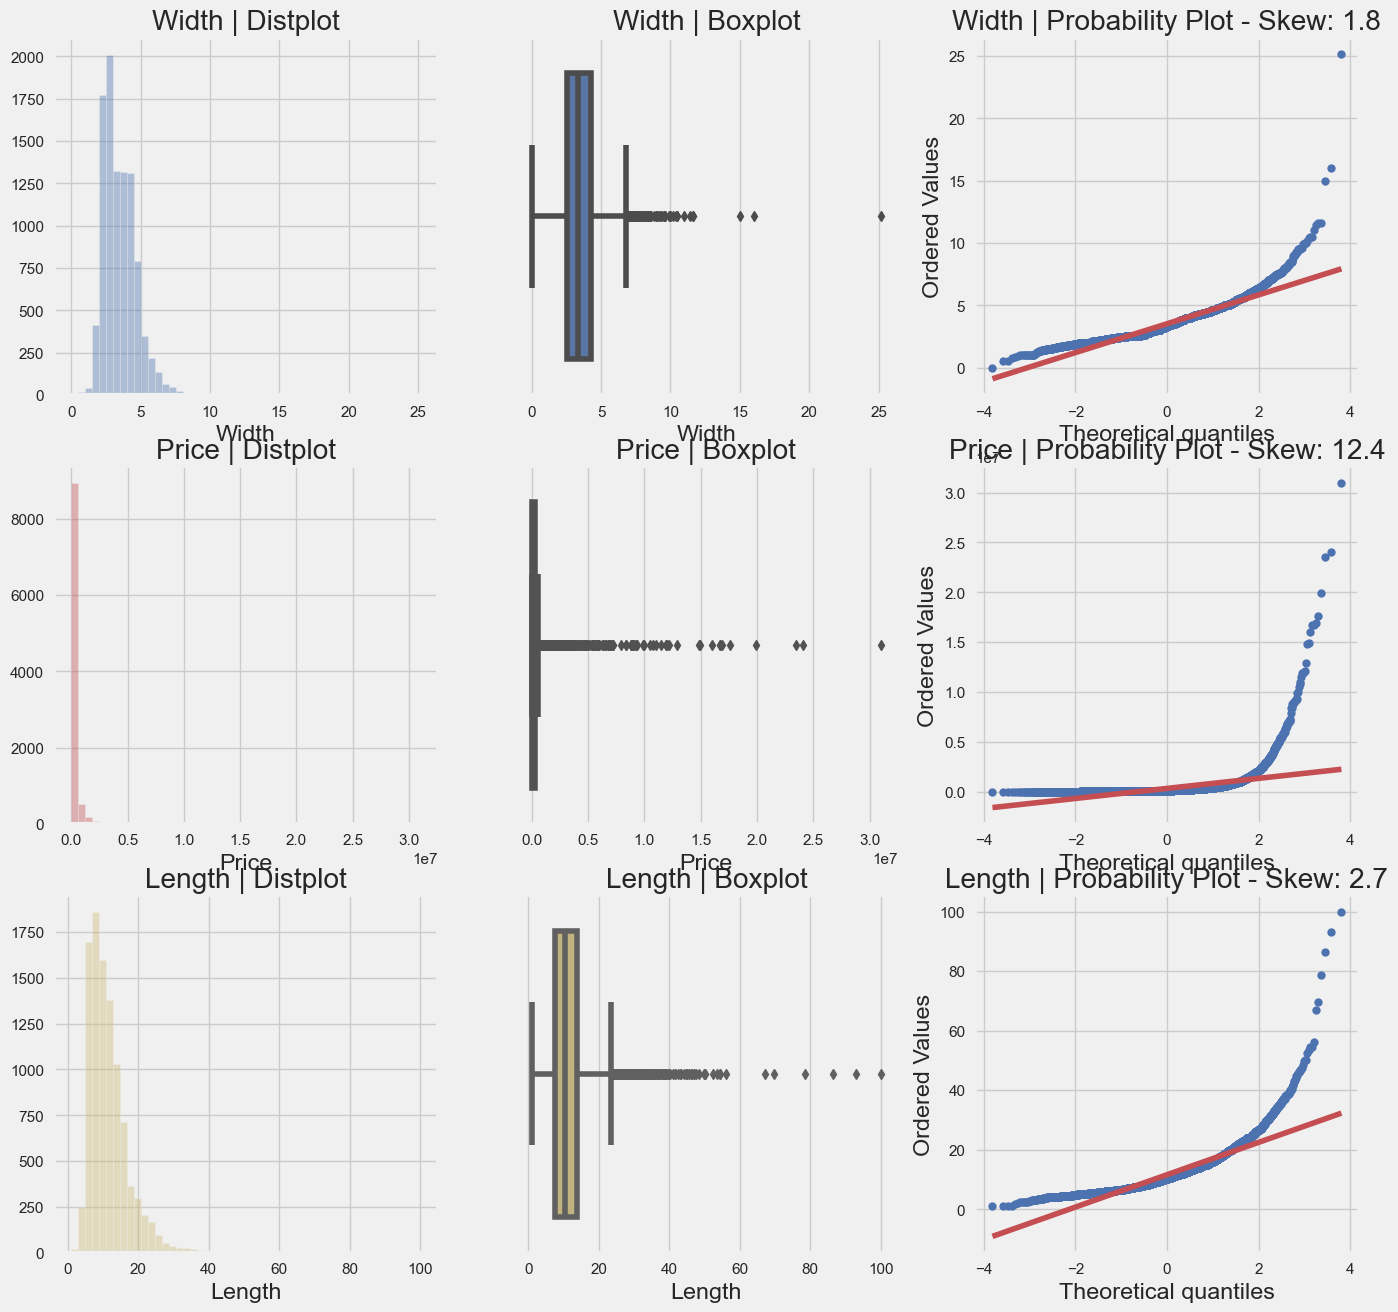

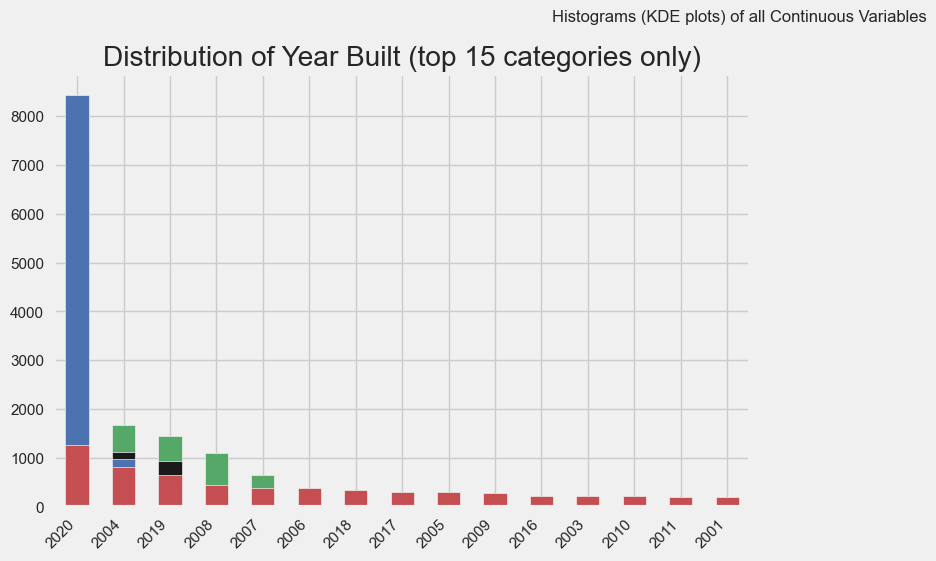

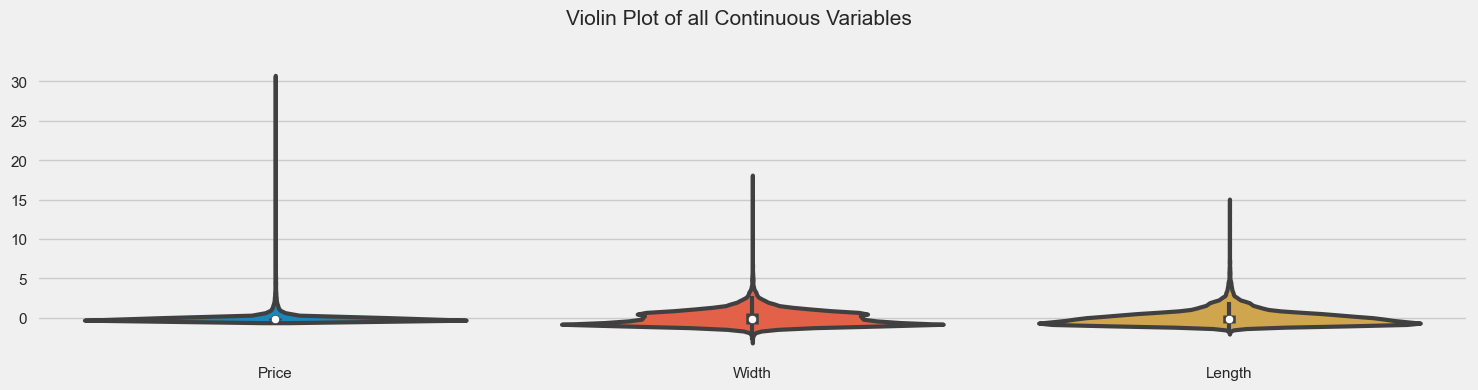

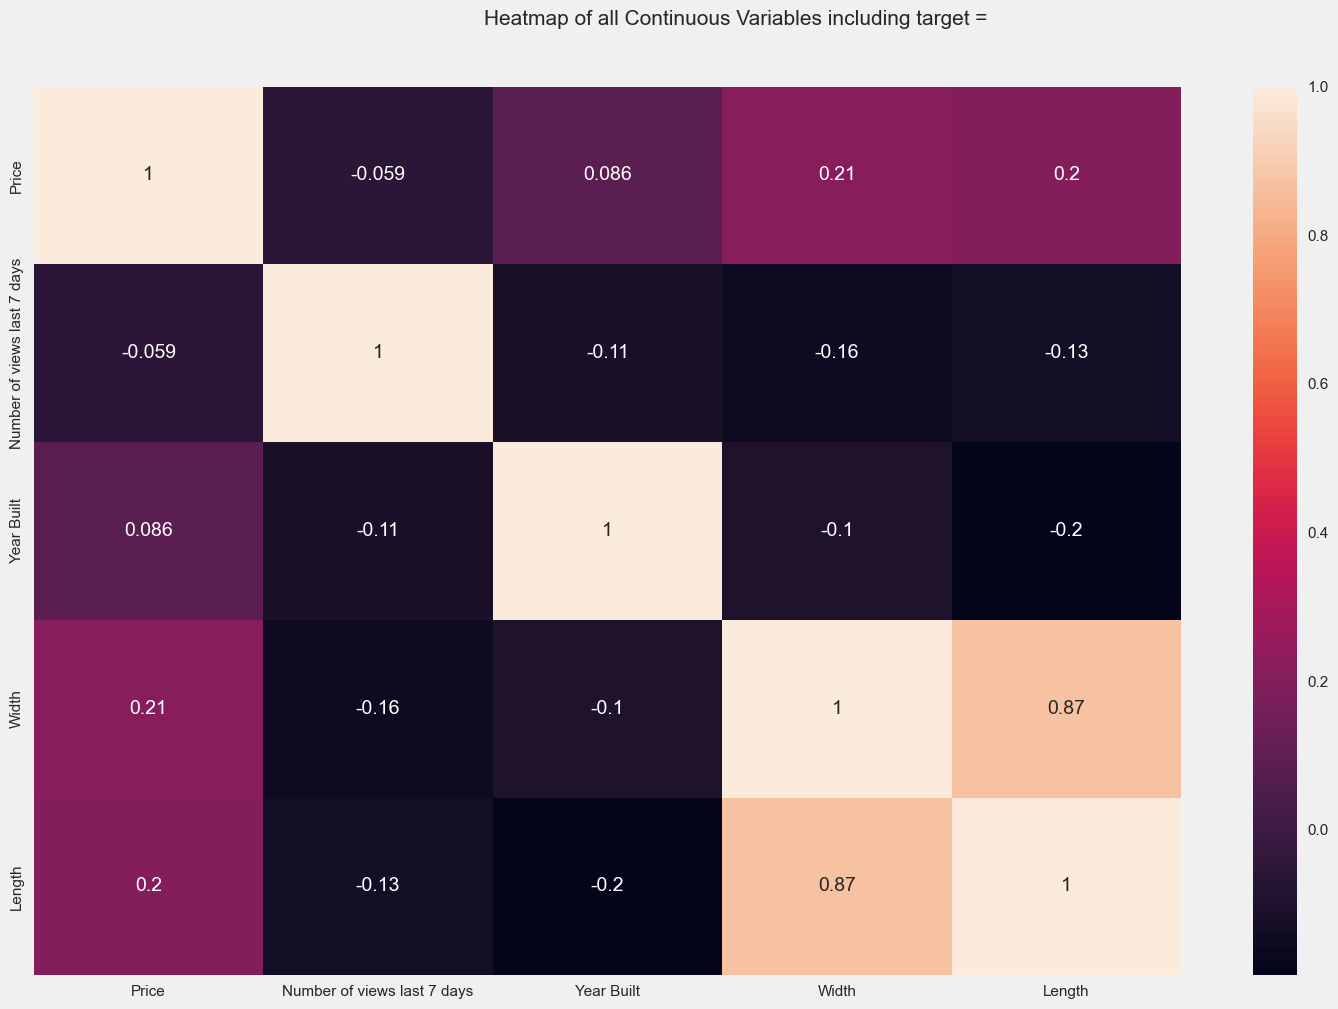

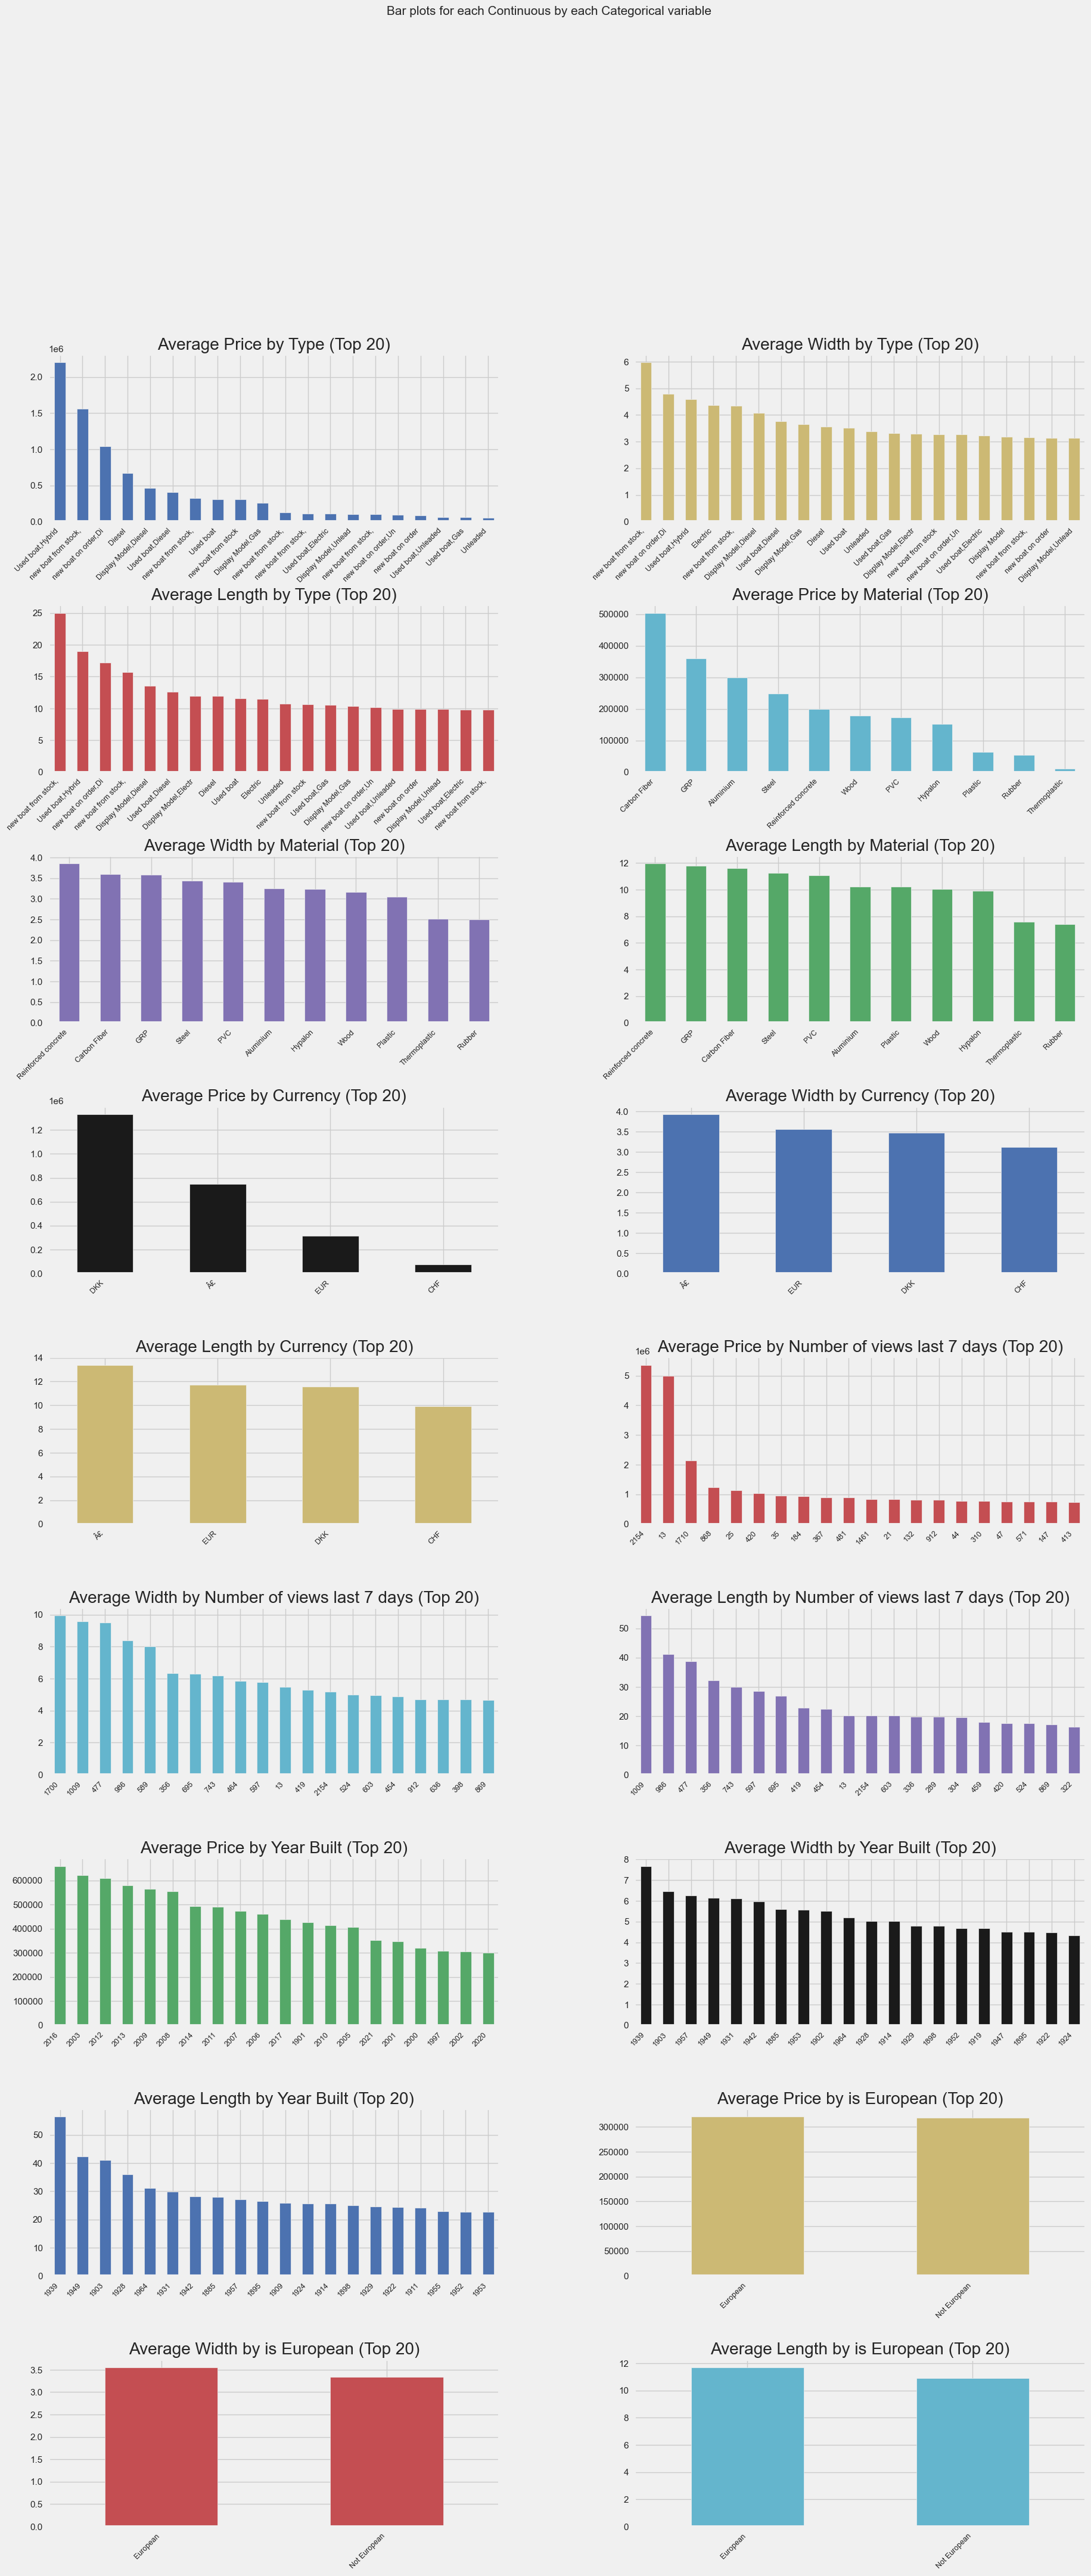


**********************************************************************
  Resource wordnet not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('wordnet')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load corpora/wordnet

  Searched in:
    - '/Users/hasanaliozkan/nltk_data'
    - '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.8/nltk_data'
    - '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.8/share/nltk_data'
    - '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.8/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************

Could not draw wordcloud plot for Manufacturer

**********************************************************************


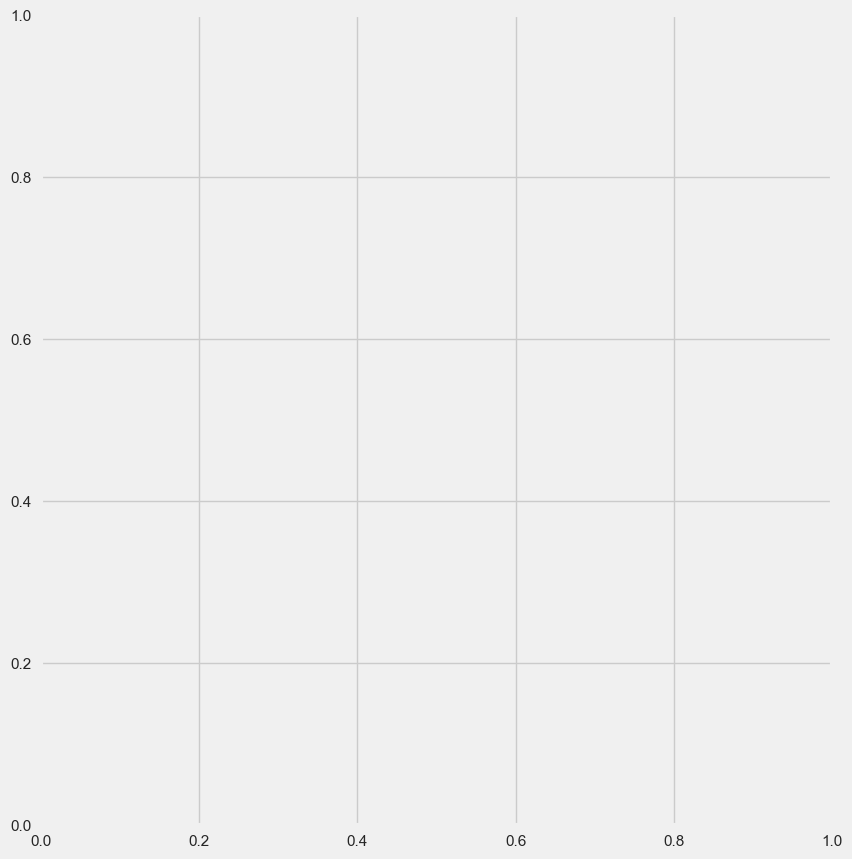

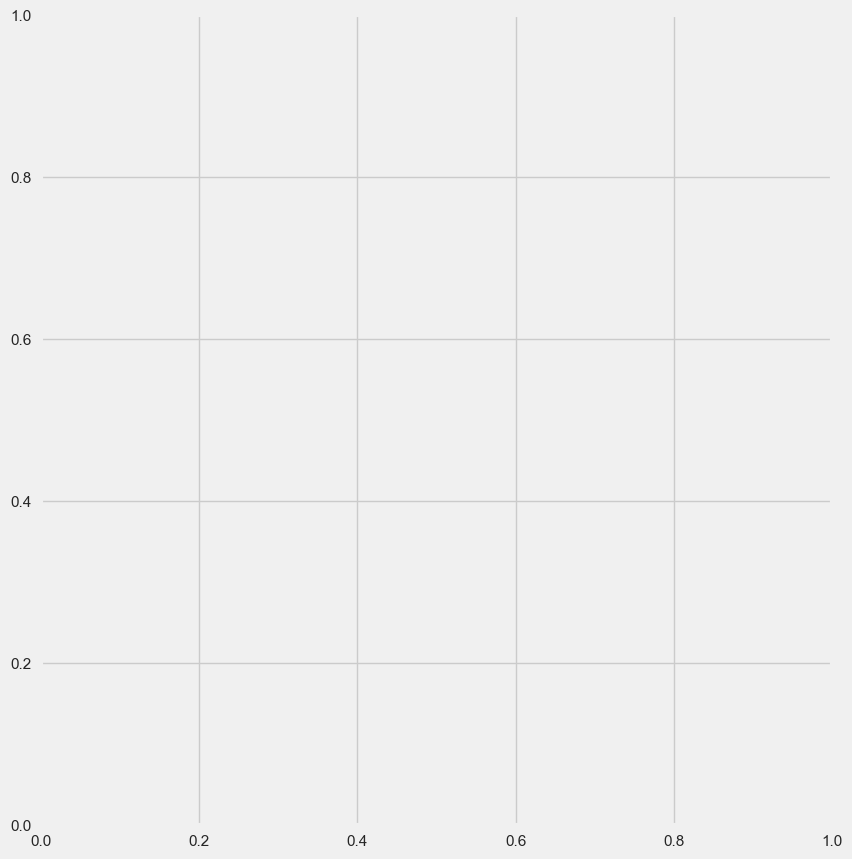

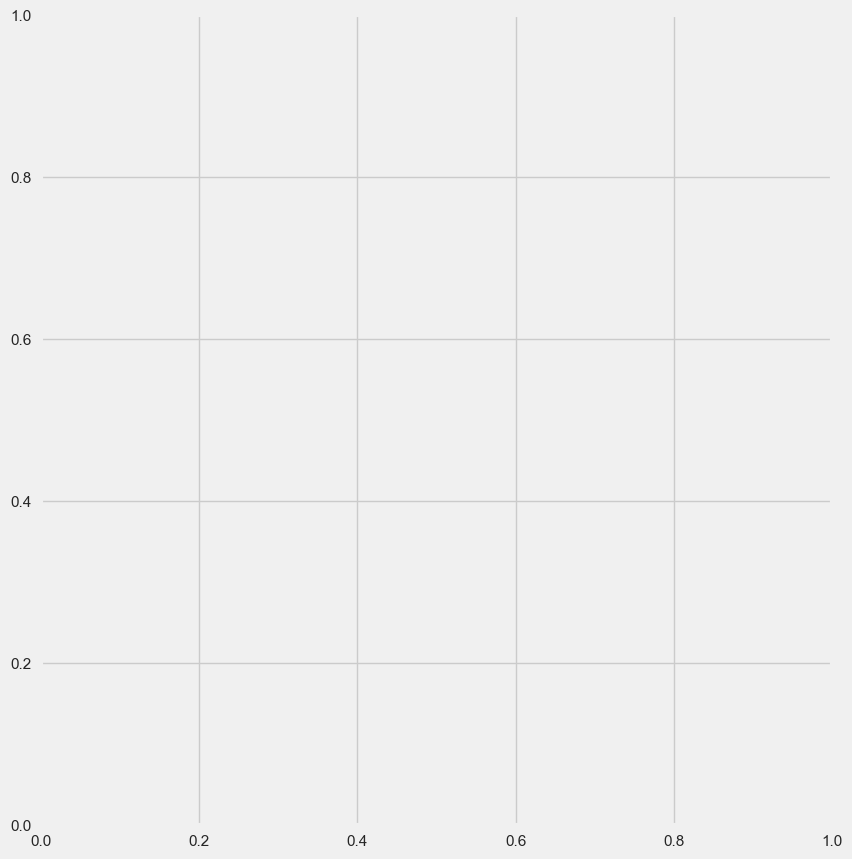

In [155]:
from autoviz.AutoViz_Class import AutoViz_Class

%matplotlib inline

AV = AutoViz_Class()


viz = AV.AutoViz("./clean_boat_data.csv",sep=",")

In [163]:
file = open('./boattype.txt', 'w')
for t in data['Boat Type'].unique():
    file.write(t + '\n')
file.close()


In [164]:
data

,Price,Boat Type,Type,Material,Location,Number of views last 7 days,Year Built,Width,Length,Manufacturer,Currency,is European
0,3337.0,Motor Yacht,new boat from stock,GRP,Switzerland,226,2017,1.90,4.00,Rigiflex power boats,CHF,Not European
1,3490.0,Center console boat,new boat from stock,Thermoplastic,Germany,75,2020,1.50,4.00,Terhi power boats,EUR,European
2,25900.0,Sport Boat,new boat from stock,GRP,Denmark,58,2019,1.46,3.55,Linder power boats,DKK,European
3,3399.0,Fishing Boat,new boat from stock,Aluminium,Germany,45,2019,1.37,3.64,Crescent power boats,EUR,European
4,3600.0,Catamaran,"Used boat,Unleaded",Aluminium,Switzerland,239,1987,1.75,4.35,Terhi power boats,CHF,Not European
...,...,...,...,...,...,...,...,...,...,...,...,...
9883,5000.0,Pilothouse,"Used boat,Unleaded",GRP,Switzerland,181,2004,2.00,6.00,8,CHF,Not European
9884,4990.0,Sport Boat,new boat on order,GRP,Switzerland,245,2004,2.50,5.70,413,CHF,Not European
9885,4980.0,Sport Boat,new boat from stock,Aluminium,Switzerland,128,2004,2.20,6.30,399,CHF,Not European
9886,4950.0,Sport Boat,new boat from stock,Aluminium,Switzerland,281,2004,2.75,12.70,431,CHF,Not European


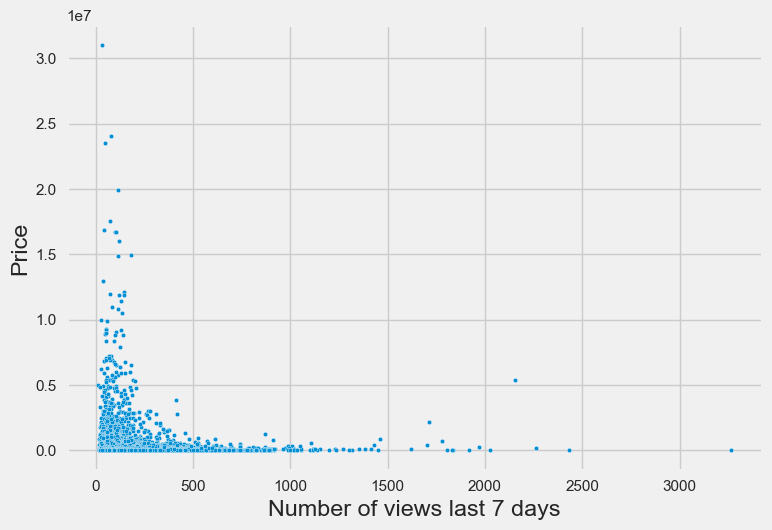

In [166]:
plt.plot()
sns.scatterplot(x=data['Number of views last 7 days'],y=data['Price'],s=10)
plt.show()